##  22MT - 20 tonne Capacity 

In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [3]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [4]:
# ProductionTank

In [5]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
#ref https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

tanks = [2202, 2203, 2204]  # List of tank IDs you want to query
ProductionTanks_df = ProductionTank.query('Tank_1 in @tanks')
print(ProductionTanks_df)

      Material    BATCHID  Tank_1             Instruction_Step   INGRED_ID  \
2001   1397022  107956670    2202         S3_BATCH_IN_PROGRESS         NaN   
2002   1397022  107956670    2202                   STEP1_CONS     1002565   
2003   1397022  107956670    2202  PLEASE VERIFY BULK ADDITION         NaN   
2004   1397022  107956670    2202                   STEP1_CONS     1037802   
2005   1397022  107956670    2202                   STEP1_CONS     1002818   
...        ...        ...     ...                          ...         ...   
7818   1775253  108051514    2203                   STEP2_CONS  U_86MT15_1   
7819   1775253  108051514    2203              STEP2_AGITATION         NaN   
7820   1775253  108051514    2203            WEIGHT_VALIDATION         NaN   
7821   1775253  108051514    2203              STEP3_AGITATION         NaN   
7822   1775253  108051514    2203                           HP         NaN   

                               INGRED_Name   Quantity       Pha

In [7]:
# Group by 'Batch' and extract the 'Quantity' for the 'HP' instruction step
hp_quantities = ProductionTanks_df[ProductionTanks_df['Instruction_Step'] == 'HP'].groupby('BATCHID')['Quantity'].sum()
#print(hp_quantities)

In [8]:
#ref #https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html
# Extracting the 'Quantity' for the 'HP' instruction step for each 'BATCHID'
hp_quantities = ProductionTanks_df[ProductionTanks_df['Instruction_Step'] == 'HP'].groupby('BATCHID')['Quantity'].sum()
# Aggregating data per tank
aggregated_ProductionTank22_df1 = ProductionTanks_df.groupby(['BATCHID','Tank_1']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay': 'sum',
    #'Quantity': 'sum',
    'Flowrate_KGMIN': 'mean',
    'Target_Phase_duration': 'mean',
    'Target_Flowrate': 'mean'
}).reset_index()

# Merging the aggregated data with the HP quantities
aggregated_ProductionTank22_df1 = aggregated_ProductionTank22_df1.merge(hp_quantities, on='BATCHID', how='left', suffixes=('', '_from_HP'))

# Print the resulting DataFrame
#print(aggregated_ProductionTank22_df1)

In [9]:
####Aggregate data per tank: BatchID , Material and Tank_1 
aggregated_ProductionTank22_df2=ProductionTanks_df.groupby(['BATCHID','Material','Tank_1']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
   'Phase_start_delay':'sum',
   'Quantity':'sum',
   'Flowrate_KGMIN':'mean',
   'Target_Phase_duration':'mean',
   'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_ProductionTank22_df2)

      BATCHID  Material  Tank_1  Phase_duration  Phase_overrun  \
0   107848868   1520984    2202             806           94.0   
1   107848868   1520984    2204             879          640.0   
2   107862335   1698522    2204             530          210.0   
3   107867810   1648637    2202            1098          884.0   
4   107867810   1648637    2203             182           25.0   
..        ...       ...     ...             ...            ...   
68  108073632   1451704    2202             873          667.0   
69  108075449   1428047    2204            1001          724.0   
70  108084749   1567195    2203             231            9.0   
71  108084749   1567195    2204             443          187.0   
72  108084750   1520984    2202             204           11.0   

    Phase_start_delay   Quantity  Flowrate_KGMIN  Target_Phase_duration  \
0                  21  18081.024       17.726500             121.500000   
1                2519  36162.048      105.548567         

## EDA on Tanks 22MT 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Just looks at batchid details produced in tank 22MT
df = pd.DataFrame(aggregated_ProductionTank22_df1)
# Just looks at batchid and materials details produced in tank 22MT
df2 = pd.DataFrame(aggregated_ProductionTank22_df2)

In [12]:
#df2

In [13]:
# Set global font settings
plt.rc('axes', titlesize=16, titleweight='bold', labelsize=14, labelweight='bold')  # For axes title and labels
plt.rc('xtick', labelsize=12)  # For x-axis tick labels
plt.rc('ytick', labelsize=12)  # For y-axis tick labels


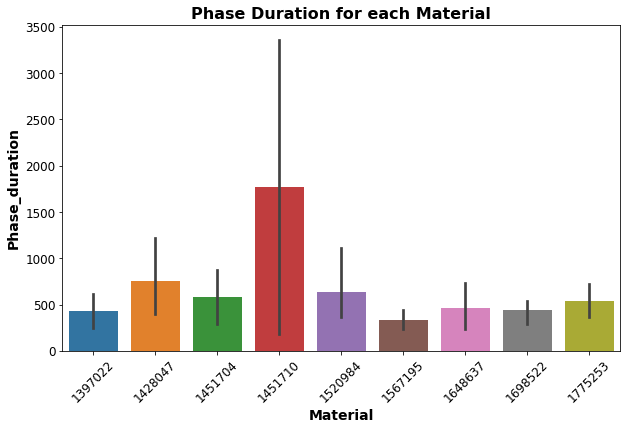

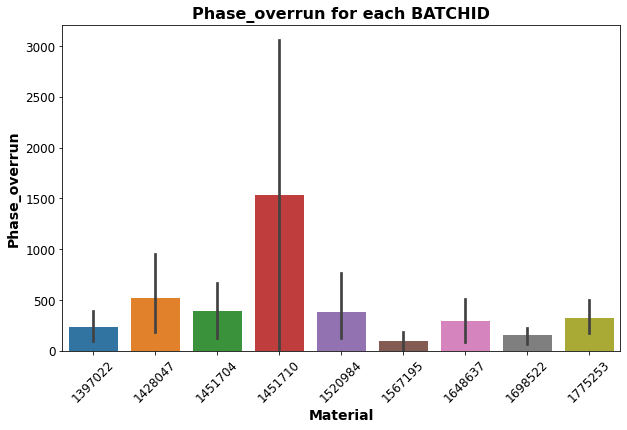

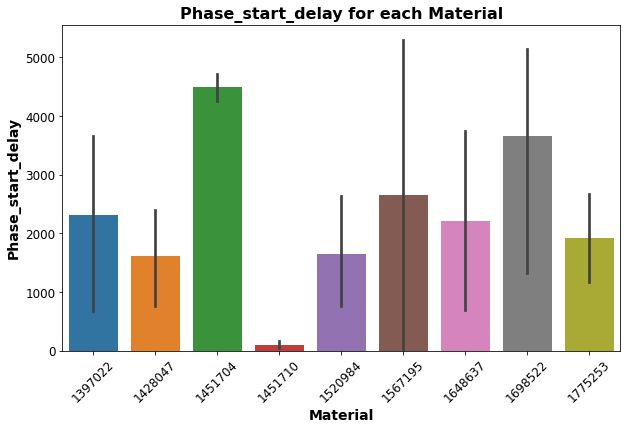

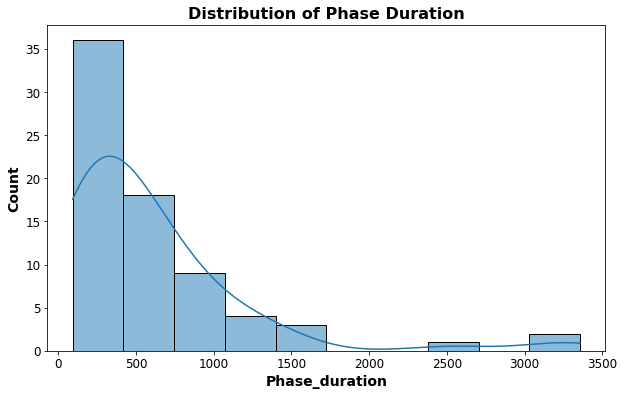

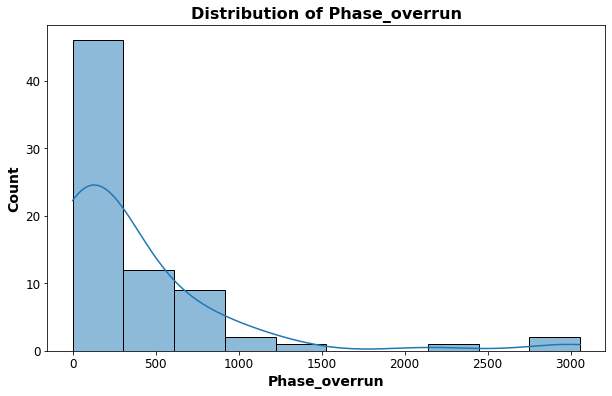

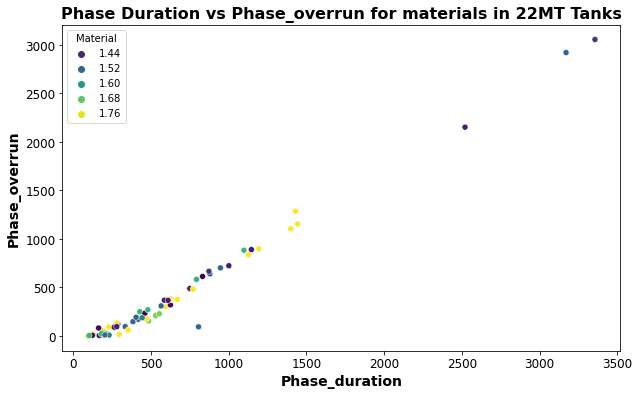

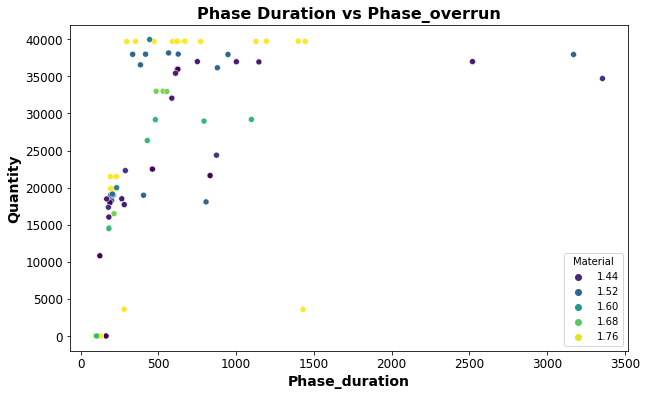

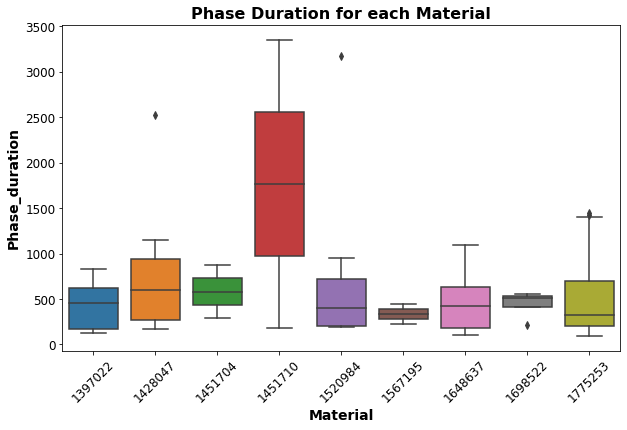

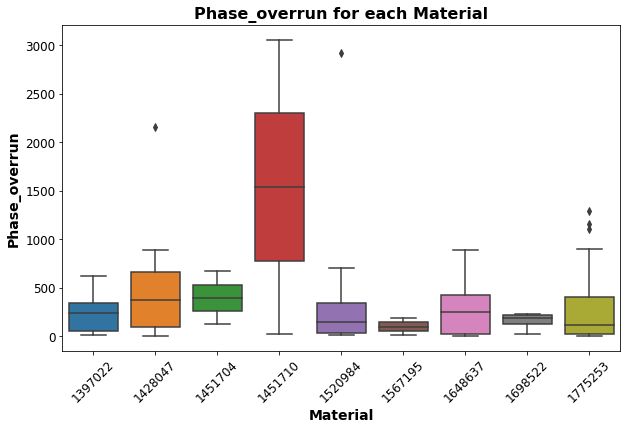

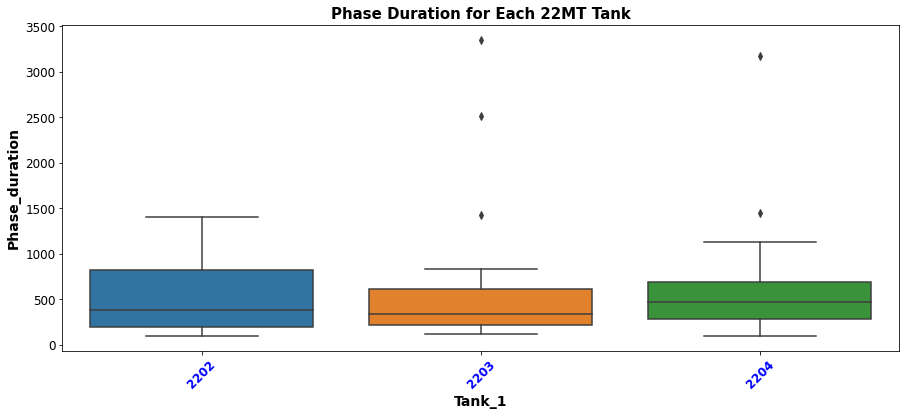

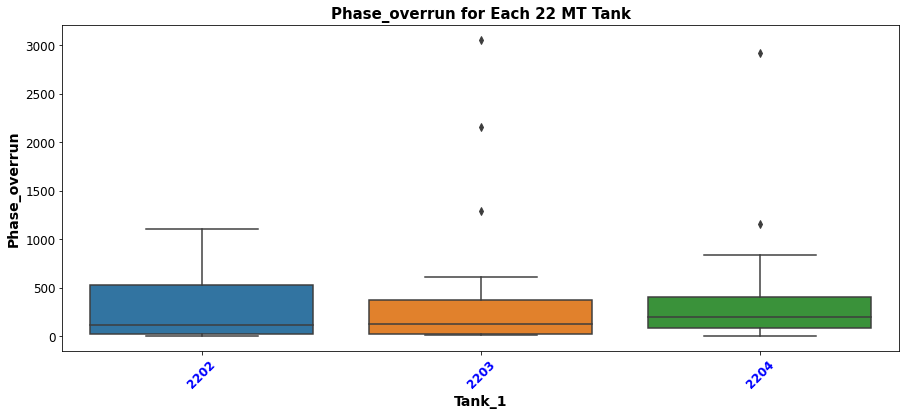

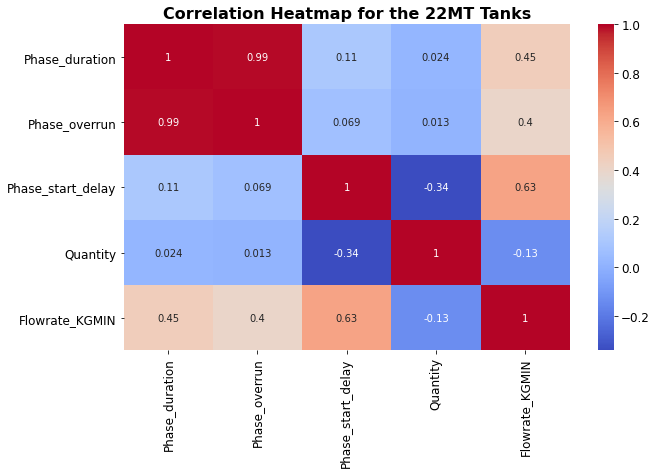

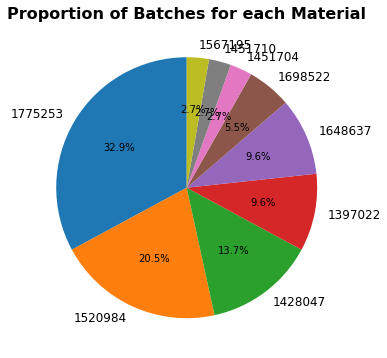

,BATCHID,Tank_1,Phase_duration,Phase_overrun,Phase_start_delay,Flowrate_KGMIN,Target_Phase_duration,Target_Flowrate,Quantity
count,7.300000e+01,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,67.000000,70.000000
mean,1.079874e+08,2203.000000,594.972603,371.684932,2026.849315,63.646040,23.235994,228.935807,28611.719200
std,6.397467e+04,0.816497,615.813260,584.612594,1954.713326,35.450276,15.595670,69.405964,9629.470801
min,1.078489e+08,2202.000000,93.000000,0.000000,2.000000,0.000000,11.100000,131.960800,11151.564000
25%,1.079567e+08,2202.000000,205.000000,25.000000,9.000000,36.774540,15.588235,188.249709,19857.794750
50%,1.079933e+08,2203.000000,428.000000,172.000000,2186.000000,68.392188,17.411765,237.850400,32062.170000
75%,1.080336e+08,2204.000000,750.000000,380.000000,3602.000000,92.402843,25.111111,247.907363,37713.667000
max,1.080848e+08,2204.000000,3356.000000,3057.000000,5474.000000,127.688275,121.500000,547.500000,39978.798000


In [14]:
#https://seaborn.pydata.org/
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(aggregated_ProductionTank22_df1)
df2 = pd.DataFrame(aggregated_ProductionTank22_df2)

# 1. Bar Chart - Phase_duration for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_duration', data=df2)
plt.title('Phase Duration for each Material')
plt.xticks(rotation=45)
plt.show()

# 1. Bar Chart - Phase_Overrun for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_overrun', data=df2)
plt.title('Phase_overrun for each BATCHID')
plt.xticks(rotation=45)
plt.show()

# 1. Bar Chart - Phase_start_delay for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_start_delay', data=df2)
plt.title('Phase_start_delay for each Material')
plt.xticks(rotation=45)
plt.show()

# 2. Histogram - Phase_duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Phase_duration'], bins=10, kde=True)
plt.title('Distribution of Phase Duration')
plt.show()

# 2. Histogram - Phase_overrun
plt.figure(figsize=(10, 6))
sns.histplot(df['Phase_overrun'], bins=10, kde=True)
plt.title('Distribution of Phase_overrun')
plt.show()

# 3. Scatter Plot - Phase_duration vs Phase_overrun
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Phase_duration', y='Phase_overrun', data=df2, hue='Material', palette='viridis')
plt.title('Phase Duration vs Phase_overrun for materials in 22MT Tanks')
plt.show()

# 3. Scatter Plot - Phase_duration vs Phase_start_delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Phase_duration', y='Quantity', data=df2, hue='Material', palette='viridis')
plt.title('Phase Duration vs Phase_overrun')
plt.show()

# 4. Box Plot - Phase_duration grouped by Material
plt.figure(figsize=(10, 6))
sns.boxplot(x='Material', y='Phase_duration', data=df2)
plt.title('Phase Duration for each Material')
plt.xticks(rotation=45)
plt.show()

# 4. Box Plot - Phase_overrun grouped by Material
plt.figure(figsize=(10, 6))
sns.boxplot(x='Material', y='Phase_overrun', data=df2)
plt.title('Phase_overrun for each Material')
plt.xticks(rotation=45)
plt.show()

# 4. Box Plot - Phase_Phase_duration grouped by each 22MT Tank
plt.figure(figsize=(15, 6))  # Adjust the size as needed
sns.boxplot(x='Tank_1', y='Phase_duration', data=aggregated_ProductionTank22_df2, order=tanks)
plt.title('Phase Duration for Each 22MT Tank', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='blue')
plt.show()

# 4. Box Plot - Phase_overrun grouped by each 22MT Tank
plt.figure(figsize=(15, 6))  # Adjust the size as needed
sns.boxplot(x='Tank_1', y='Phase_overrun', data=aggregated_ProductionTank22_df2, order=tanks)
plt.title('Phase_overrun for Each 22 MT Tank', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='blue')
plt.show()

# 5. Heatmap - Correlation heatmap
correlation_matrix = df[['Phase_duration', 'Phase_overrun', 'Phase_start_delay','Quantity','Flowrate_KGMIN']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for the 22MT Tanks')
plt.show()

# 6. Pie Chart - Proportion of batches for each Material
material_counts = df2['Material'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(material_counts, labels=material_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Batches for each Material')
plt.show()

#7 Descriptive Statistics 

aggregated_ProductionTank22_df1.describe()


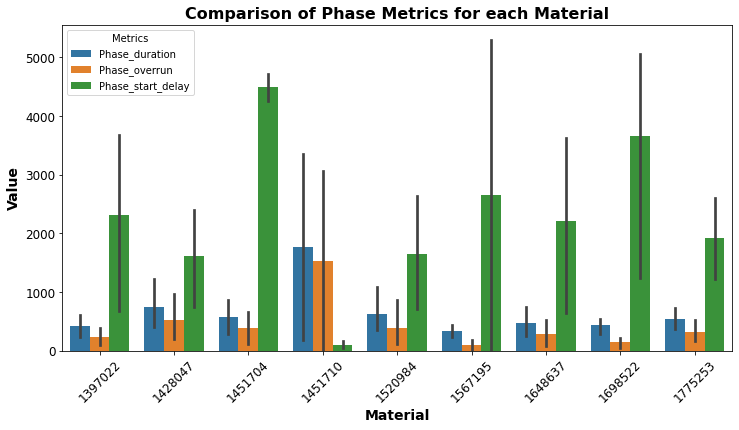

In [15]:
#https://pandas.pydata.org/docs/reference/api/pandas.melt.html
df = pd.DataFrame(aggregated_ProductionTank22_df2)

# Melt the data to get it in long form
df_melted = df.melt(id_vars='Material', value_vars=['Phase_duration', 'Phase_overrun', 'Phase_start_delay'])

# Grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Material', y='value', hue='variable', data=df_melted)
plt.title('Comparison of Phase Metrics for each Material')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

In [16]:
## Examining the differences in production of materials that are common between all 22MT tanks

In [17]:
tanks_in_group1 = ['2202', '2203', '2204']
common_materials = aggregated_ProductionTank22_df2.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [18]:
filtered_data = aggregated_ProductionTank22_df2[aggregated_ProductionTank22_df2['Material'].isin(common_materials)]

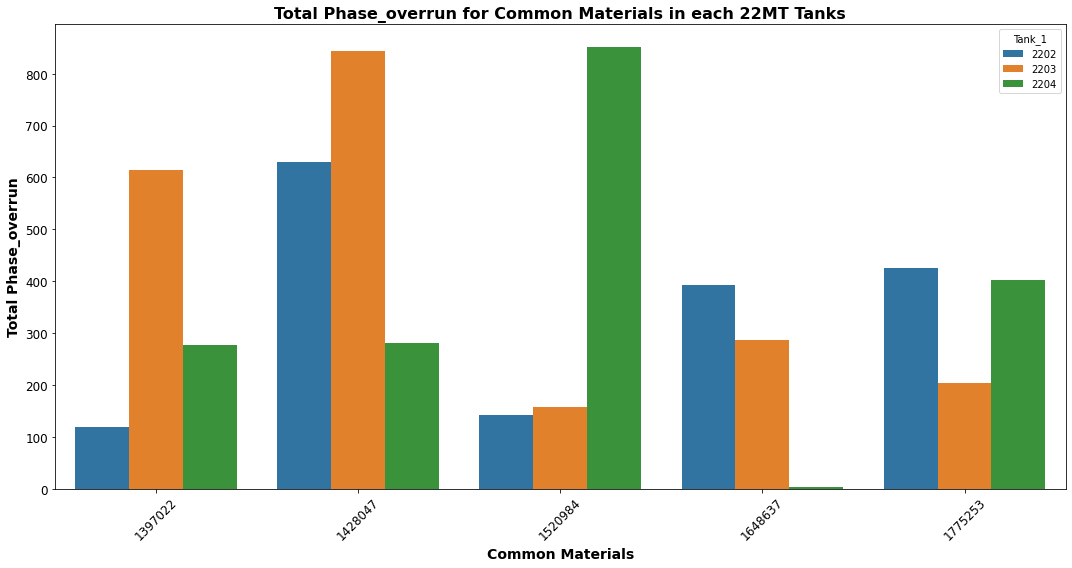

In [19]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_overrun', hue='Tank_1', ci=None)

plt.title('Total Phase_overrun for Common Materials in each 22MT Tanks')
plt.ylabel('Total Phase_overrun')
plt.xlabel('Common Materials')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

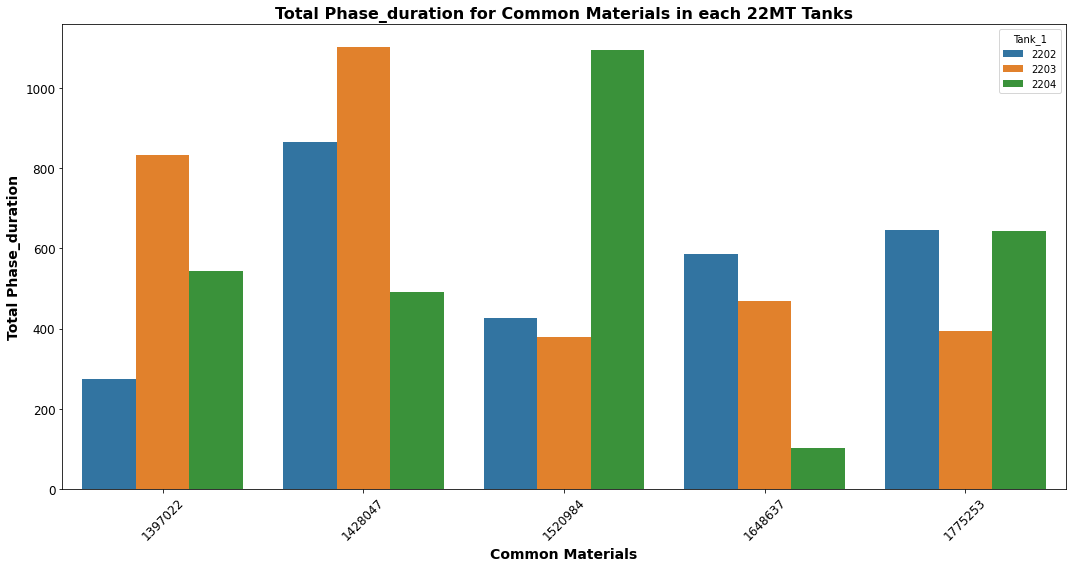

In [20]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_duration', hue='Tank_1', ci=None)

plt.title('Total Phase_duration for Common Materials in each 22MT Tanks')
plt.ylabel('Total Phase_duration')
plt.xlabel('Common Materials')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

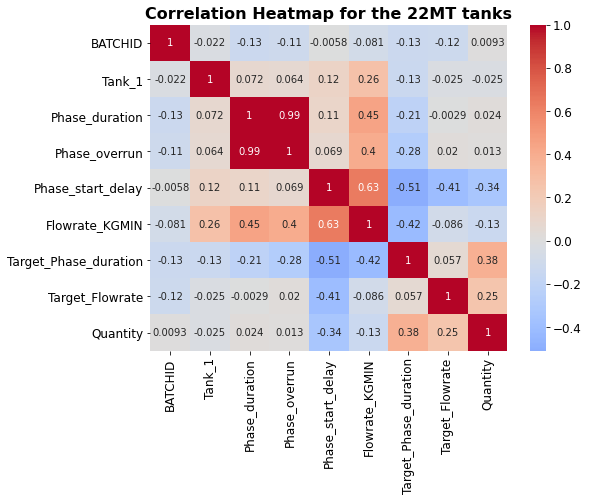

In [21]:
correlation_matrix = aggregated_ProductionTank22_df1.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap for the 22MT tanks")
plt.show()

### Data Preprocessing 

In [22]:
# Handling missing values
#aggregated_ProductionTank22_df1.dropna(inplace=True)  # Remove rows with missing values

In [23]:
#https://towardsdatascience.com/the-complete-beginners-guide-to-data-cleaning-and-preprocessing-2070b7d4c6d
# Determine the number of missing values for each column
print(aggregated_ProductionTank22_df1.isna().sum())

# Replace missing values with zeros for the entire DataFrame
aggregated_ProductionTank22_df1.fillna(0, inplace=True)

BATCHID                  0
Tank_1                   0
Phase_duration           0
Phase_overrun            0
Phase_start_delay        0
Flowrate_KGMIN           0
Target_Phase_duration    0
Target_Flowrate          6
Quantity                 3
dtype: int64


In [24]:
# Handling duplicates
duplicates = aggregated_ProductionTank22_df1[aggregated_ProductionTank22_df1.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [BATCHID, Tank_1, Phase_duration, Phase_overrun, Phase_start_delay, Flowrate_KGMIN, Target_Phase_duration, Target_Flowrate, Quantity]
Index: []


In [25]:
# Handling duplicates
aggregated_ProductionTank22_df1.drop_duplicates(inplace=True)  # Remove duplicate rows

## Removing Outliers - Creating two separate dataframes , one for transformation for the first set of models that dont have this included in the code 


In [26]:
#https://www.kaggle.com/code/drgilermo/a-tutorial-for-complete-beginners
#https://www.geeksforgeeks.org/data-preprocessing-machine-learning-python/
# Define columns where you want to detect and remove outliers
ProductionTank22_df1 = pd.DataFrame(aggregated_ProductionTank22_df1)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank22_df1 = remove_outliers_iqr(ProductionTank22_df1, col)

# Display the cleaned DataFrame
#print(ProductionTank22_df1)

In [27]:
# Define columns where you want to detect and remove outliers
ProductionTank22_df2 = pd.DataFrame(aggregated_ProductionTank22_df1)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank22_df2 = remove_outliers_iqr(ProductionTank22_df2, col)

# Display the cleaned DataFrame
#print(ProductionTank22_df2)

In [28]:
# For the original DataFrame
#print("Original DataFrame Summary Statistics:")
print(aggregated_ProductionTank22_df1.describe())

# After removing outliers
#print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank22_df1.describe())

            BATCHID       Tank_1  Phase_duration  Phase_overrun  \
count  7.300000e+01    73.000000       73.000000      73.000000   
mean   1.079874e+08  2203.000000      594.972603     371.684932   
std    6.397467e+04     0.816497      615.813260     584.612594   
min    1.078489e+08  2202.000000       93.000000       0.000000   
25%    1.079567e+08  2202.000000      205.000000      25.000000   
50%    1.079933e+08  2203.000000      428.000000     172.000000   
75%    1.080336e+08  2204.000000      750.000000     380.000000   
max    1.080848e+08  2204.000000     3356.000000    3057.000000   

       Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  \
count          73.000000       73.000000              73.000000   
mean         2026.849315       63.646040              23.235994   
std          1954.713326       35.450276              15.595670   
min             2.000000        0.000000              11.100000   
25%             9.000000       36.774540              15.5882

In [29]:
# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
# Scaling numerical variables - Applying to dataframe ProductionTank22_df1 for application to the linear and ensemble models 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN','Quantity']
ProductionTank22_df1[numerical_cols] = scaler.fit_transform(ProductionTank22_df1[numerical_cols])
print(ProductionTank22_df1.head())

     BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
1  107848868    2204        1.372806       1.463322           0.070062   
2  107862335    2204        0.171367      -0.175945           1.461980   
3  107867810    2202        2.126717       2.393510          -0.121378   
4  107867810    2203       -1.026629      -0.881211          -1.210482   
6  107887071    2203       -0.665164      -0.503798           1.199712   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  Quantity  
1        1.195633              16.266667       302.778350  0.776775  
2        0.422082              19.176471       152.181450 -1.286111  
3        0.699415              11.150000       177.123836  0.046486  
4       -1.818100              17.583333       229.221200  0.046486  
6        0.696206              11.437500       226.111543 -1.846945  


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df1' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df1)

# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate','Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

#https://www.kaggle.com/code/emineyetm/multiple-linear-regression-in-python
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)
rf_feature_importance = rf_model.feature_importances_

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)
gb_feature_importance = gb_model.feature_importances_

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)



# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
#results_df.to_excel('22MT results.xlsx', index=False)


+----+-----------------------------+-------------+------------+------------+------------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |    Test R2 |
+====+=============================+=============+============+============+============+
|  0 | Linear Regression           | 0.018612    |  0.0110014 | 0.981652   |  0.988334  |
+----+-----------------------------+-------------+------------+------------+------------+
|  1 | Ridge Regression            | 0.0194394   |  0.0131029 | 0.980836   |  0.986106  |
+----+-----------------------------+-------------+------------+------------+------------+
|  2 | Lasso Regression            | 1.00581     |  0.96017   | 0.00844994 | -0.0181557 |
+----+-----------------------------+-------------+------------+------------+------------+
|  3 | Random Forest Regressor     | 0.00405625  |  0.0116385 | 0.996001   |  0.987659  |
+----+-----------------------------+-------------+------------+------------+------------+
|  4 | Gra

In [31]:
#https://www.w3schools.com/python/python_ml_cross_validation.asp
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    DecisionTreeRegressor(random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42)
]

results = []


# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    #print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")
    
     # Append results to a list
    results.append({
        'Model': model_name,
        'Mean MSE': mean_mse,
        'Std MSE': std_mse
    })
print(results)
# Convert the results to a DataFrame
#df = pd.DataFrame(results)

# Save the results to an Excel file
#df.to_excel("22MTmodel_results.xlsx", index=False)
#a file named model_results.xlsx in the current working directory containing the mean and standard deviation of the MSE for each model. You can then open this file with Excel to view the results.

   

[{'Model': 'LinearRegression', 'Mean MSE': 0.022299612872052864, 'Std MSE': 0.009711095185231411}, {'Model': 'Ridge', 'Mean MSE': 0.023925262381321415, 'Std MSE': 0.010991911257866476}, {'Model': 'Lasso', 'Mean MSE': 1.1068148662074968, 'Std MSE': 0.4045622703028699}, {'Model': 'RandomForestRegressor', 'Mean MSE': 0.020739759835869984, 'Std MSE': 0.007052763509093397}, {'Model': 'GradientBoostingRegressor', 'Mean MSE': 0.02698634272130654, 'Std MSE': 0.008771177427688799}, {'Model': 'DecisionTreeRegressor', 'Mean MSE': 0.02810461807467164, 'Std MSE': 0.01069261182772532}, {'Model': 'AdaBoostRegressor', 'Mean MSE': 0.025239565770927692, 'Std MSE': 0.008268422600770702}, {'Model': 'BaggingRegressor', 'Mean MSE': 0.022882732706485543, 'Std MSE': 0.008710464536549138}]


Best parameters for Ridge Regression: {'alpha': 0.1}
Best parameters for Lasso Regression: {'alpha': 0.01}
Best parameters for Random Forest Regressor: {'max_depth': 10, 'n_estimators': 100}
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
Best parameters for Decision Tree Regressor: {'max_depth': 20}
Best parameters for Bagging Regressor: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 200}
                         Model  Train MSE  Test MSE  Train R2   Test R2
0            Linear Regression   0.018612  0.011001  0.981652  0.988334
1             Ridge Regression   0.018621  0.011148  0.981643  0.988179
2             Lasso Regression   0.019269  0.011131  0.981004  0.988196
3      Random Forest Regressor   0.005208  0.008088  0.994866  0.991423
4  Gradient Boosting Regressor   0.002954  0.046586  0.997088  0.950601
5      Decision Tree Regressor   0.000000  0.103265  1.000000  0.890499
6            Bagging Regressor

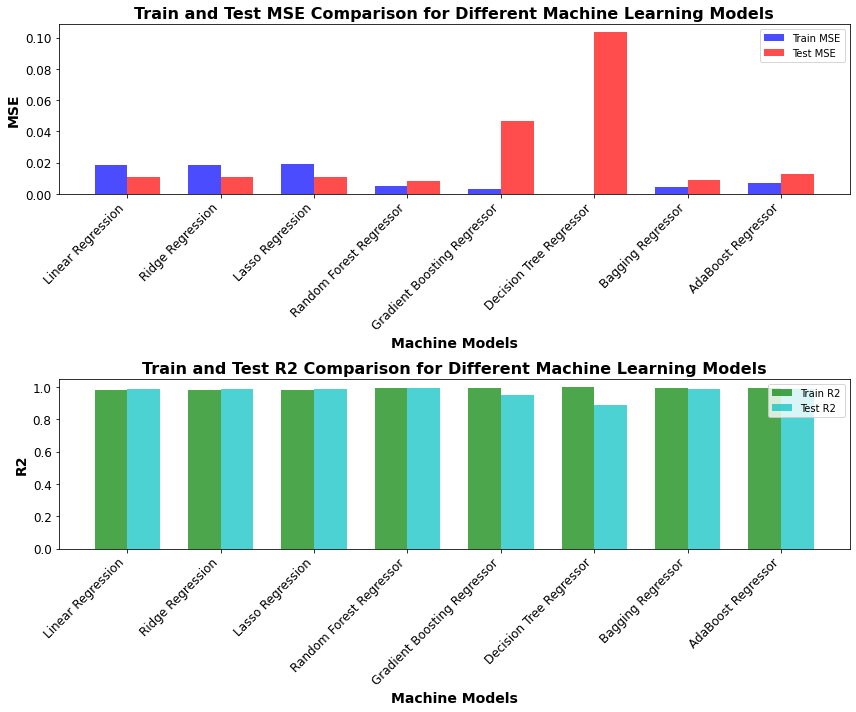

In [32]:
#https://www.w3schools.com/python/python_ml_grid_search.asp
from sklearn.model_selection import train_test_split, GridSearchCV
# Load your dataset (replace 'ProductionTank2202_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df1)

# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate','Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)
print(f"Best parameters for Ridge Regression: {ridge_grid.best_params_}")

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)
print(f"Best parameters for Lasso Regression: {lasso_grid.best_params_}")

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)
print(f"Best parameters for Random Forest Regressor: {rf_grid.best_params_}")

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)
print(f"Best parameters for Gradient Boosting Regressor: {gb_grid.best_params_}")

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)
print(f"Best parameters for Decision Tree Regressor: {dt_grid.best_params_}")

# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)
print(f"Best parameters for Bagging Regressor: {bag_grid.best_params_}")

# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
#ada_best = ada_grid.best_estimator_

# Use the best estimator to make predictions
#ada_pred_train = best_ada.predict(X_train)
#ada_pred_test = best_ada.predict(X_test)

ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)

# Print the results DataFrame
print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
#results_df.to_excel('22MT TUN results.xlsx', index=False)

import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding Train and Test MSE and R2
models = results_df['Model']
train_mse = results_df['Train MSE']
test_mse = results_df['Test MSE']
train_r2 = results_df['Train R2']
test_r2 = results_df['Test R2']

# Create subplots for MSE and R2
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Create bars for Train and Test MSE
ax1.bar(index - bar_width/2, train_mse, bar_width, label='Train MSE', alpha=0.7, color='b', align='center')
ax1.bar(index + bar_width/2, test_mse, bar_width, label='Test MSE', alpha=0.7, color='r', align='center')
ax1.set_xlabel('Machine Models')
ax1.set_ylabel('MSE')
ax1.set_title('Train and Test MSE Comparison for Different Machine Learning Models')
ax1.set_xticks(index)
ax1.set_xticklabels(models, rotation=45, ha="right")
ax1.legend()

# Create bars for Train and Test R2
ax2.bar(index - bar_width/2, train_r2, bar_width, label='Train R2', alpha=0.7, color='g', align='center')
ax2.bar(index + bar_width/2, test_r2, bar_width, label='Test R2', alpha=0.7, color='c', align='center')
ax2.set_xlabel('Machine Models')
ax2.set_ylabel('R2')
ax2.set_title('Train and Test R2 Comparison for Different Machine Learning Models')
ax2.set_xticks(index)
ax2.set_xticklabels(models, rotation=45, ha="right")
ax2.legend()

plt.tight_layout()
plt.show()

#### Generation a scatter plots of predicted values against actual values and residual plots for the mentioned models. The plot_predictions function takes in a list of models, the actual test values, their predictions, and the names of the models, and plots the two aforementioned types of visualizations.

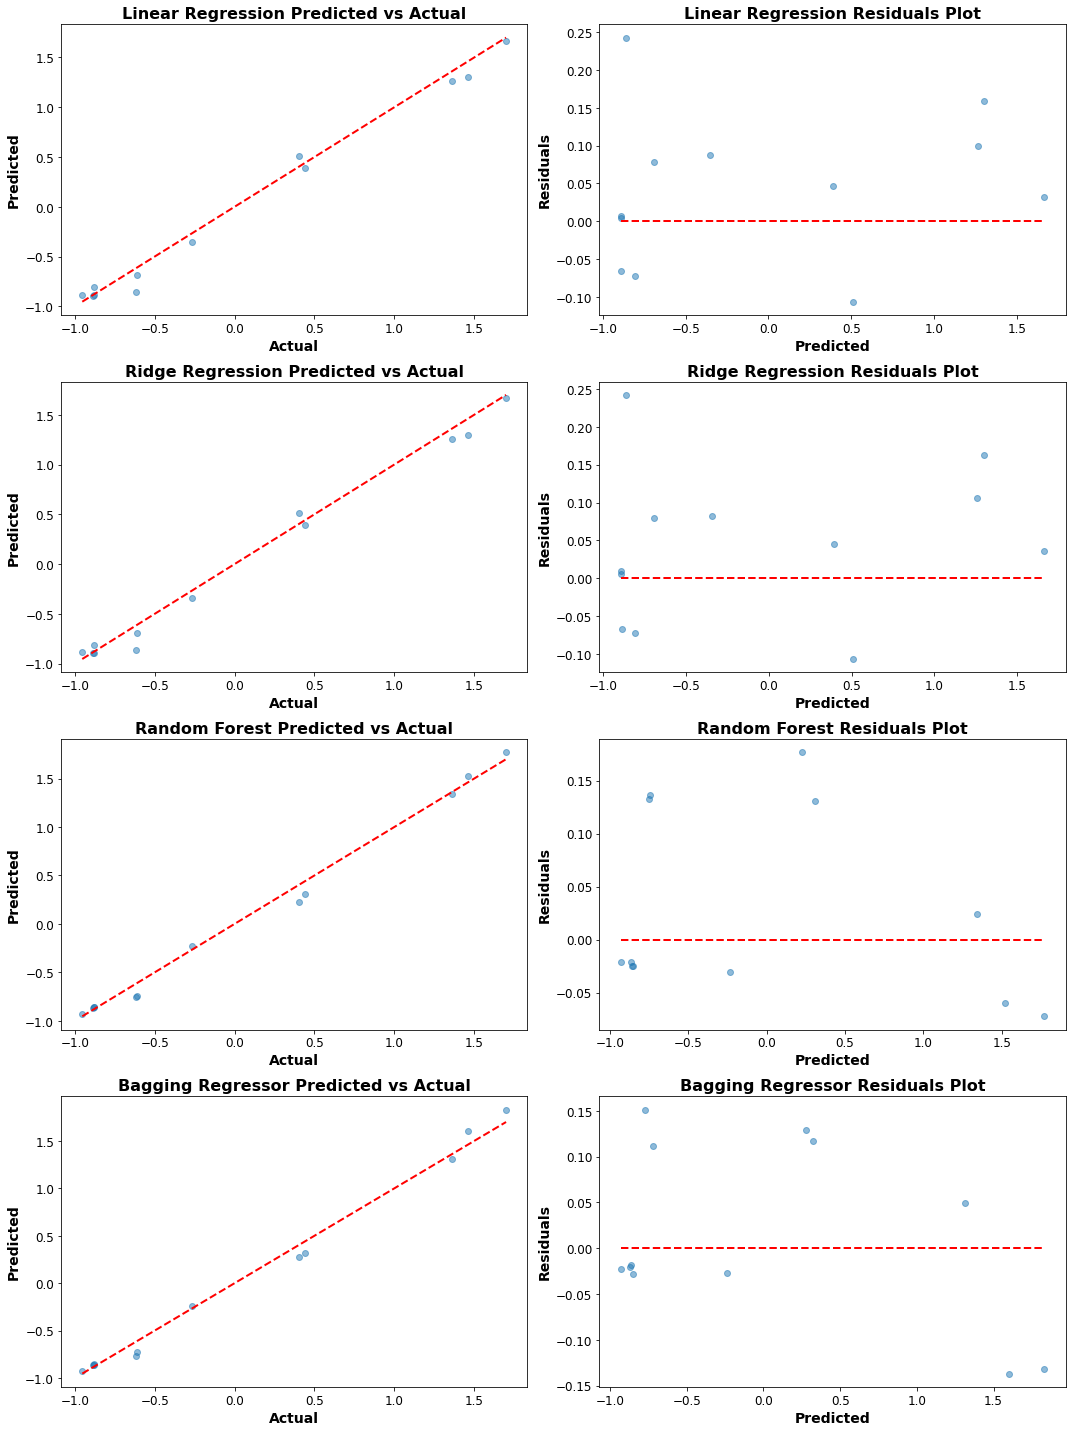

In [33]:
#https://coderzcolumn.com/tutorials/machine-learning/scikit-plot-visualizing-machine-learning-algorithm-results-and-performance
# Visualization function
def plot_predictions(models, actual, predictions, model_names):
    fig, ax = plt.subplots(len(models), 2, figsize=(15, 5*len(models)))
    
    for i, (model, pred, name) in enumerate(zip(models, predictions, model_names)):
        # Scatter plot of predicted vs actual
        ax[i][0].scatter(actual, pred, alpha=0.5)
        ax[i][0].plot([min(actual), max(actual)], [min(actual), max(actual)], '--', lw=2, color='red')
        ax[i][0].set_title(f'{name} Predicted vs Actual')
        ax[i][0].set_xlabel('Actual')
        ax[i][0].set_ylabel('Predicted')

        # Residuals plot
        residuals = actual - pred
        ax[i][1].scatter(pred, residuals, alpha=0.5)
        ax[i][1].hlines(0, min(pred), max(pred), colors='red', linestyles='--', lw=2)
        ax[i][1].set_title(f'{name} Residuals Plot')
        ax[i][1].set_xlabel('Predicted')
        ax[i][1].set_ylabel('Residuals')

    plt.tight_layout()
    plt.show()

# Collecting models and their predictions
models_list = [lr_model, best_ridge, best_rf, bag_best]
predictions_list = [lr_pred_test, ridge_pred_test, rf_pred_test, bag_pred_test]
model_names = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'Bagging Regressor']

# Plotting
plot_predictions(models_list, y_test, predictions_list, model_names)

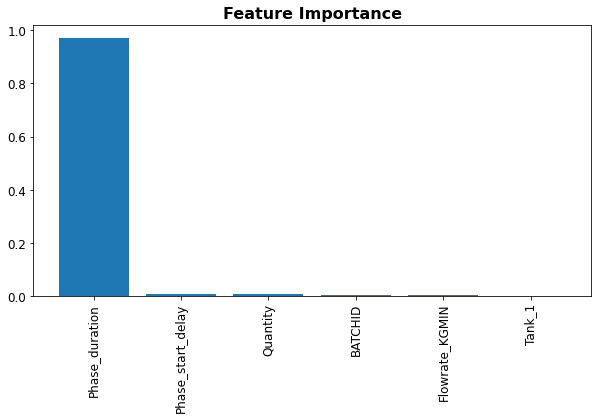

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train is your training dataset and y_train is the target variable
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

### k-fold cross-validator

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Initialize k-fold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define the models to be evaluated
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42)
]

# Iterate through each model and perform k-fold cross-validation
for model in models:
    model_name = model.__class__.__name__
    train_mse_list = []
    test_mse_list = []
    train_r2_list = []
    test_r2_list = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
        train_r2_list.append(train_r2)
        test_r2_list.append(test_r2)
    
    mean_train_mse = sum(train_mse_list) / num_folds
    mean_test_mse = sum(test_mse_list) / num_folds
    mean_train_r2 = sum(train_r2_list) / num_folds
    mean_test_r2 = sum(test_r2_list) / num_folds
    
    results_df = results_df.append({'Model': model_name, 'Train MSE': mean_train_mse, 'Test MSE': mean_test_mse,
                                    'Train R2': mean_train_r2, 'Test R2': mean_test_r2}, ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
#results_df.to_excel('22 MT kfold_results.xlsx', index=False)

+----+---------------------------+-----------------+-----------------+--------------+--------------+
|    | Model                     |       Train MSE |        Test MSE |     Train R2 |      Test R2 |
+====+===========================+=================+=================+==============+==============+
|  0 | LinearRegression          |  1114.28        |  1466.56        |  0.983677    |  0.972303    |
+----+---------------------------+-----------------+-----------------+--------------+--------------+
|  1 | Ridge                     |  1114.38        |  1466.75        |  0.983676    |  0.972296    |
+----+---------------------------+-----------------+-----------------+--------------+--------------+
|  2 | Lasso                     |  1116.04        |  1475.69        |  0.983651    |  0.972133    |
+----+---------------------------+-----------------+-----------------+--------------+--------------+
|  3 | RandomForestRegressor     |   261.492       |  1555.92        |  0.996088    |  0.97

### Model- KNeighborsRegressor/SVR

In [36]:
#https://towardsdatascience.com/machine-learning-basics-k-nearest-neighbors-classification-6c1e0b209542
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
#https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

# Assuming you've loaded 'ProductionTank22_df2' somewhere in your code
df = pd.DataFrame(aggregated_ProductionTank22_df2)

X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
y = df['Phase_overrun']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2', 'CV MSE Mean', 'CV MSE Std'])

# Function to perform model training, prediction and storing results
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)
    
    # Perform cross-validation
    cv_scores = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    results_df.loc[name] = [name, train_mse, test_mse, train_r2, test_r2, cv_mean, cv_std]

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn_model, 'K-Nearest Neighbors')

# Support Vector Machine
svm_model = SVR(kernel='rbf')
evaluate_model(svm_model, 'Support Vector Machine')

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('22 MT knn_svm_results.xlsx', index=False)

def hypertune_model(model, params, name):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_

    evaluate_model(best_model, name)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
hypertune_model(KNeighborsRegressor(), knn_params, 'K-Nearest Neighbors')

# Support Vector Machine
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}
hypertune_model(SVR(), svm_params, 'Support Vector Machine')

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('22MT knn_svm_results Tuned.xlsx', index=False)

+------------------------+------------------------+-------------+------------+------------+------------+---------------+--------------+
|                        | Model                  |   Train MSE |   Test MSE |   Train R2 |    Test R2 |   CV MSE Mean |   CV MSE Std |
+========================+========================+=============+============+============+============+===============+==============+
| K-Nearest Neighbors    | K-Nearest Neighbors    |     89987.3 |     150891 |   0.679851 |  0.726998  |        151842 |       119859 |
+------------------------+------------------------+-------------+------------+------------+------------+---------------+--------------+
| Support Vector Machine | Support Vector Machine |    309281   |     570328 |  -0.100335 | -0.0318739 |        322842 |       298578 |
+------------------------+------------------------+-------------+------------+------------+------------+---------------+--------------+
Fitting 5 folds for each of 32 candidates, total

### Model Simple NN and LSTM

In [37]:
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
#https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
#https://towardsdatascience.com/understanding-lstm-and-its-quick-implementation-in-keras-for-sentiment-analysis-af410fd85b47
#https://medium.com/@dclengacher/keras-lstm-recurrent-neural-networks-c1f5febde03d
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(aggregated_ProductionTank22_df2)

# Define features and target
#X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
#y = df['Phase_overrun']

X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
y = df['Phase_overrun']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Simple Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

print(tabulate(results_df, headers='keys', tablefmt='grid'))


from keras.layers import LSTM

# Assuming X_train_scaled and X_test_scaled are already prepared

# Reshape input data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define LSTM model
def build_lstm():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the LSTM
lstm = build_lstm()
lstm.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_lstm = lstm.predict(X_train_reshaped)
pred_test_lstm = lstm.predict(X_test_reshaped)
train_mse_lstm = mean_squared_error(y_train, pred_train_lstm)
test_mse_lstm = mean_squared_error(y_test, pred_test_lstm)
train_r2_lstm = r2_score(y_train, pred_train_lstm)
test_r2_lstm = r2_score(y_test, pred_test_lstm)
results_df = results_df.append({'Model': 'LSTM Neural Network', 'Train MSE': train_mse_lstm,
                                'Test MSE': test_mse_lstm, 'Train R2': train_r2_lstm, 'Test R2': test_r2_lstm},
                               ignore_index=True)
print(tabulate(results_df, headers='keys', tablefmt='grid'))


#results_df.to_excel('22MT LSTM SNN Neural Network.xlsx', index=False)


1/1 [==============================] - 0s 31ms/step
+----+-----------------------+-------------+------------+------------+-----------+
|    | Model                 |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=======================+=============+============+============+===========+
|  0 | Simple Neural Network |      415271 |     660226 |  -0.477415 | -0.194523 |
+----+-----------------------+-------------+------------+------------+-----------+
1/1 [==============================] - 0s 31ms/step
+----+-----------------------+-------------+------------+------------+-----------+
|    | Model                 |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=======================+=============+============+============+===========+
|  0 | Simple Neural Network |      415271 |     660226 |  -0.477415 | -0.194523 |
+----+-----------------------+-------------+------------+------------+-----------+
|  1 | LSTM Neural Network   |      423192 |     669308 |  -0.5055

### simple_nn_model - TUNED

In [38]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# ... [your data loading, preprocessing, etc.]

# Define a parameter grid to search through
param_grid = {
    'dense1_neurons': [32, 64, 128],
    'dense2_neurons': [16, 32, 64],
    'epochs': [30, 50],
    'batch_size': [16, 32, 64],
}

# Adjust the function to take the hyperparameters as parameters
def build_simple_nn(dense1_neurons=64, dense2_neurons=32):
    model = Sequential()
    model.add(Dense(dense1_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(dense2_neurons, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using KerasRegressor
simple_nn_model = KerasRegressor(build_fn=build_simple_nn, verbose=0)

# GridSearchCV
simple_nn_search = GridSearchCV(estimator=simple_nn_model, param_grid=param_grid, cv=3, verbose=1)
simple_nn_search_result = simple_nn_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Simple NN Params:", simple_nn_search_result.best_params_)

# Predict using the best model on training data
train_preds = simple_nn_search.best_estimator_.predict(X_train_scaled)

# Calculate the MSE and R2 for the training data
train_mse = mean_squared_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Predict using the best model on test data
test_preds = simple_nn_search.best_estimator_.predict(X_test_scaled)

# Calculate the MSE and R2 for the test data
test_mse = mean_squared_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

# Print the results
print("Training MSE:", train_mse)
print("Training R^2:", train_r2)
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)

# Here, you can use simple_nn_search_result.best_estimator_ to make predictions and evaluate the model.

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Simple NN Params: {'batch_size': 16, 'dense1_neurons': 128, 'dense2_neurons': 64, 'epochs': 50}
Training MSE: 208745.1521313429
Training R^2: 0.2573437033251236
Test MSE: 394597.2816988338
Test R^2: 0.28606879986315203


 ### Model': lstm- tuned

In [39]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the LSTM model for grid search
def create_lstm(lstm_neurons=50):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Grid search hyperparameters
lstm_param_grid = {
    'lstm_neurons': [30, 50, 70],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

lstm_model = KerasRegressor(build_fn=create_lstm, verbose=0)
lstm_search = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, verbose=1)
lstm_search_result = lstm_search.fit(X_train_reshaped, y_train)

# Print the best parameters
print("Best LSTM Params:", lstm_search_result.best_params_)

# Predict using the best model on training data
train_preds_lstm = lstm_search_result.best_estimator_.predict(X_train_reshaped)

# Calculate the MSE and R2 for the training data
train_mse_lstm = mean_squared_error(y_train, train_preds_lstm)
train_r2_lstm = r2_score(y_train, train_preds_lstm)

# Predict using the best model on test data
test_preds_lstm = lstm_search_result.best_estimator_.predict(X_test_reshaped)

# Calculate the MSE and R2 for the test data
test_mse_lstm = mean_squared_error(y_test, test_preds_lstm)
test_r2_lstm = r2_score(y_test, test_preds_lstm)

# Print the results
print("Training MSE for LSTM:", train_mse_lstm)
print("Training R^2 for LSTM:", train_r2_lstm)
print("Test MSE for LSTM:", test_mse_lstm)
print("Test R^2 for LSTM:", test_r2_lstm)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best LSTM Params: {'batch_size': 16, 'epochs': 100, 'lstm_neurons': 70}
Training MSE for LSTM: 388526.5462136504
Training R^2 for LSTM: -0.38226772226719175
Test MSE for LSTM: 626115.140382208
Test R^2 for LSTM: -0.1328084463037038


### 'Model': 'Dense Neural Network 

NB : the following code is creating, training, and evaluating an MLP or Dense Neural Network.
Neural Network Structure: The function build_simple_nn creates a sequential neural network model. The network has the following structure:

Input layer with 128 neurons and ReLU activation.
Hidden layer with 64 neurons and ReLU activation.
Another hidden layer with 32 neurons and ReLU activation.
Output layer with 1 neuron (because you're predicting a single value).
This makes it a multi-layer perceptron (MLP) with three dense (fully connected) layers.

In [40]:
#https://www.analyticsvidhya.com/blog/2021/08/hyperparameter-tuning-of-neural-networks-using-keras-tuner/
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(aggregated_ProductionTank22_df2)

X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Dense Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

# Print the results DataFrame
#print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
#results_df.to_excel('neural_network_results1.xlsx', index=False)

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(neurons_layer1=128, neurons_layer2=64, neurons_layer3=32):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(neurons_layer3, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

param_dist = {
    'batch_size': [16, 32, 64],
    'epochs': [20, 50, 100],
    'neurons_layer1': [64, 128, 256],
    'neurons_layer2': [32, 64, 128],
    'neurons_layer3': [16, 32, 64]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_search_result = random_search.fit(X_train_scaled, y_train)

print("Best Score: ", random_search_result.best_score_)
print("Best Params: ", random_search_result.best_params_)

best_nn = random_search_result.best_estimator_.model
pred_train_best_nn = best_nn.predict(X_train_scaled)
pred_test_best_nn = best_nn.predict(X_test_scaled)

train_mse_best_nn = mean_squared_error(y_train, pred_train_best_nn)
test_mse_best_nn = mean_squared_error(y_test, pred_test_best_nn)
train_r2_best_nn = r2_score(y_train, pred_train_best_nn)
test_r2_best_nn = r2_score(y_test, pred_test_best_nn)

results_df = results_df.append({'Model': 'Dense Neural Network (Optimized)', 'Train MSE': train_mse_best_nn,
                                'Test MSE': test_mse_best_nn, 'Train R2': train_r2_best_nn, 'Test R2': test_r2_best_nn},
                               ignore_index=True)
#Remember that the parameters given above are just examples; you can expand or restrict the grid as per your computational capability and needs. Also, depending on the number of combinations and the size of your data, this can take a significant amount of time to run.


best_nn = random_search_result.best_estimator_.model
pred_train_best_nn = best_nn.predict(X_train_scaled)
pred_test_best_nn = best_nn.predict(X_test_scaled)

train_mse_best_nn = mean_squared_error(y_train, pred_train_best_nn)
test_mse_best_nn = mean_squared_error(y_test, pred_test_best_nn)
train_r2_best_nn = r2_score(y_train, pred_train_best_nn)
test_r2_best_nn = r2_score(y_test, pred_test_best_nn)

results_df = results_df.append({'Model': 'Dense Neural Network (Optimized)', 'Train MSE': train_mse_best_nn,
                                'Test MSE': test_mse_best_nn, 'Train R2': train_r2_best_nn, 'Test R2': test_r2_best_nn},
                               ignore_index=True)



results_df.to_excel('22MT denseNN_results.xlsx', index=False)
print(tabulate(results_df, headers='keys', tablefmt='grid'))

1/1 [==============================] - 0s 32ms/step
Best Score:  -43172.314453125
Best Params:  {'neurons_layer3': 64, 'neurons_layer2': 64, 'neurons_layer1': 128, 'epochs': 100, 'batch_size': 32}
1/1 [==============================] - 0s 31ms/step
+----+----------------------------------+-------------+------------+------------+-----------+
|    | Model                            |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+==================================+=============+============+============+===========+
|  0 | Dense Neural Network             |    223394   |   406942   |   0.205227 |  0.263734 |
+----+----------------------------------+-------------+------------+------------+-----------+
|  1 | Dense Neural Network (Optimized) |     20417.8 |    45746.4 |   0.927359 |  0.917233 |
+----+----------------------------------+-------------+------------+------------+-----------+
|  2 | Dense Neural Network (Optimized) |     20417.8 |    45746.4 |   0.927359 |  0.917233 |

### Results 

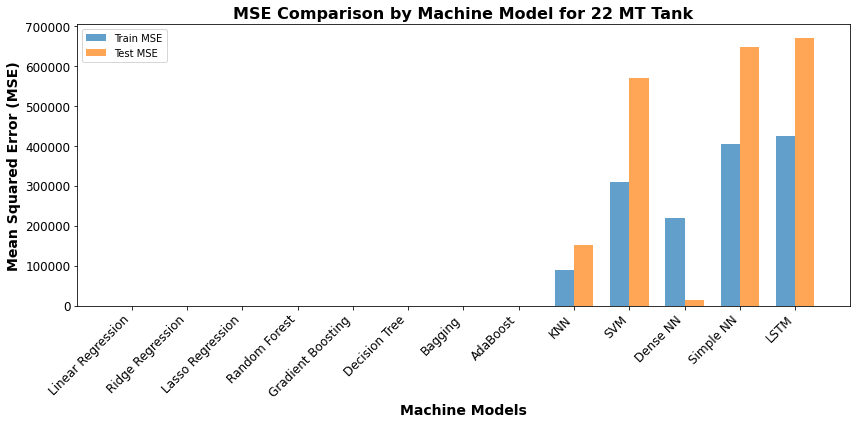

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the provided results
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'Bagging', 'AdaBoost', 'KNN', 'SVM', 'Dense NN', 'Simple NN', 'LSTM']
train_mse = [0.02, 0.02, 1.01, 0.00, 0.00, 0.00, 0.00, 0.01, 89987.30, 309281, 218078, 404674, 423495]
test_mse = [0.01, 0.01, 0.96, 0.01, 0.04, 0.08, 0.01, 0.01, 150891.00, 570328.00, 13261.7, 647169, 669948]
train_r2 = [0.98, 0.98, 0.01, 1.00, 1.00, 1.00, 1.00, 0.99, 0.68, -0.10, 0.22, -0.44, -0.51]
test_r2 = [0.99, 0.99, 0.99, 0.99, 0.96, 0.91, 0.99, 0.99, 0.73, 0.73, 0.27, -0.17, -0.21]

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(models))

bar1 = ax.bar(index, train_mse, bar_width, label='Train MSE', alpha=0.7)
bar2 = ax.bar(index + bar_width, test_mse, bar_width, label='Test MSE', alpha=0.7)

ax.set_xlabel('Machine Models')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('MSE Comparison by Machine Model for 22 MT Tank')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

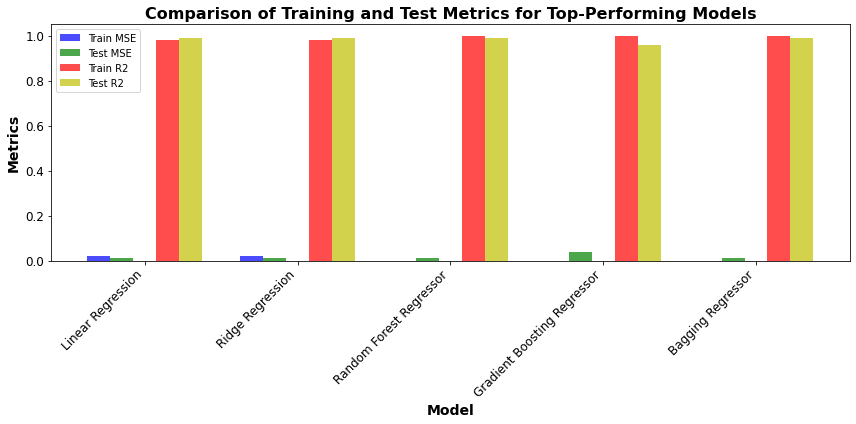

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame with the top-performing models and their results
data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'Bagging Regressor'],
    'Train MSE': [0.02, 0.02, 0.00, 0.00, 0.00],
    'Test MSE': [0.01, 0.01, 0.01, 0.04, 0.01],
    'Train R2': [0.98, 0.98, 1.00, 1.00, 1.00],
    'Test R2': [0.99, 0.99, 0.99, 0.96, 0.99]
}

top_models_df = pd.DataFrame(data)

# Create a bar chart for Train MSE, Test MSE, Train R2, and Test R2
plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(top_models_df))

plt.bar(index - 2*bar_width, top_models_df['Train MSE'], bar_width, label='Train MSE', alpha=0.7, color='b')
plt.bar(index - bar_width, top_models_df['Test MSE'], bar_width, label='Test MSE', alpha=0.7, color='g')
plt.bar(index + bar_width, top_models_df['Train R2'], bar_width, label='Train R2', alpha=0.7, color='r')
plt.bar(index + 2*bar_width, top_models_df['Test R2'], bar_width, label='Test R2', alpha=0.7, color='y')

plt.xlabel('Model')
plt.ylabel('Metrics')
plt.title('Comparison of Training and Test Metrics for Top-Performing Models')
plt.xticks(index, top_models_df['Model'], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

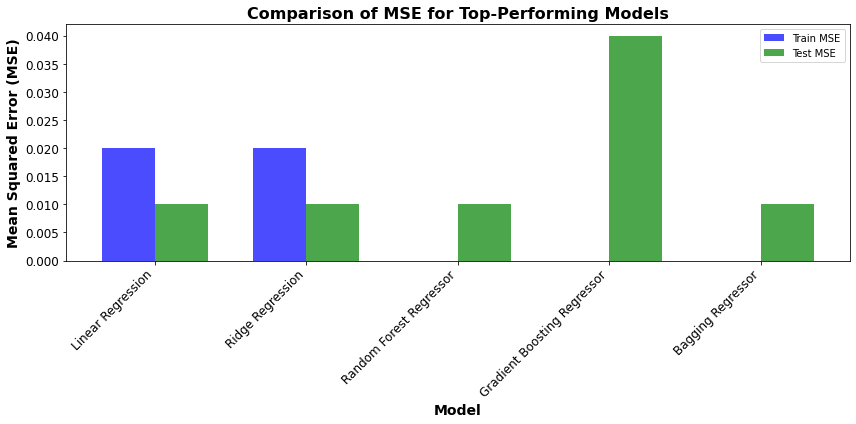

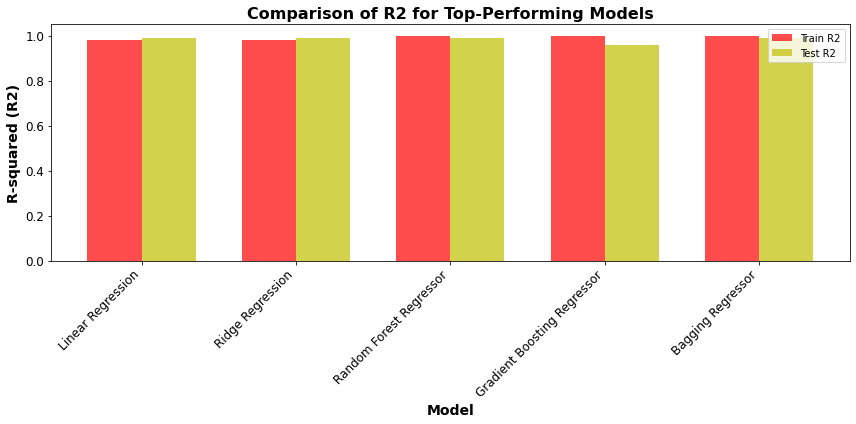

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame with the top-performing models and their results
data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'Bagging Regressor'],
    'Train MSE': [0.02, 0.02, 0.00, 0.00, 0.00],
    'Test MSE': [0.01, 0.01, 0.01, 0.04, 0.01],
    'Train R2': [0.98, 0.98, 1.00, 1.00, 1.00],
    'Test R2': [0.99, 0.99, 0.99, 0.96, 0.99]
}

top_models_df = pd.DataFrame(data)

# Create a bar chart for Train MSE and Test MSE
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(top_models_df))

plt.bar(index - bar_width/2, top_models_df['Train MSE'], bar_width, label='Train MSE', alpha=0.7, color='b')
plt.bar(index + bar_width/2, top_models_df['Test MSE'], bar_width, label='Test MSE', alpha=0.7, color='g')

plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Top-Performing Models')
plt.xticks(index, top_models_df['Model'], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# Create a bar chart for Train R2 and Test R2
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(top_models_df))

plt.bar(index - bar_width/2, top_models_df['Train R2'], bar_width, label='Train R2', alpha=0.7, color='r')
plt.bar(index + bar_width/2, top_models_df['Test R2'], bar_width, label='Test R2', alpha=0.7, color='y')

plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R2 for Top-Performing Models')
plt.xticks(index, top_models_df['Model'], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

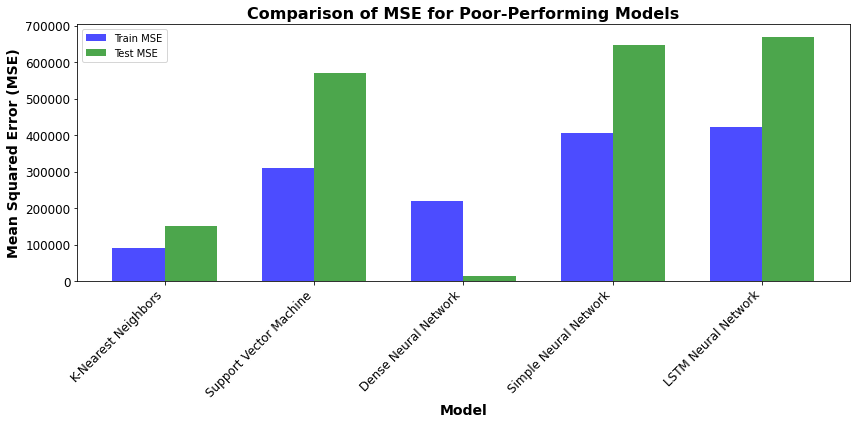

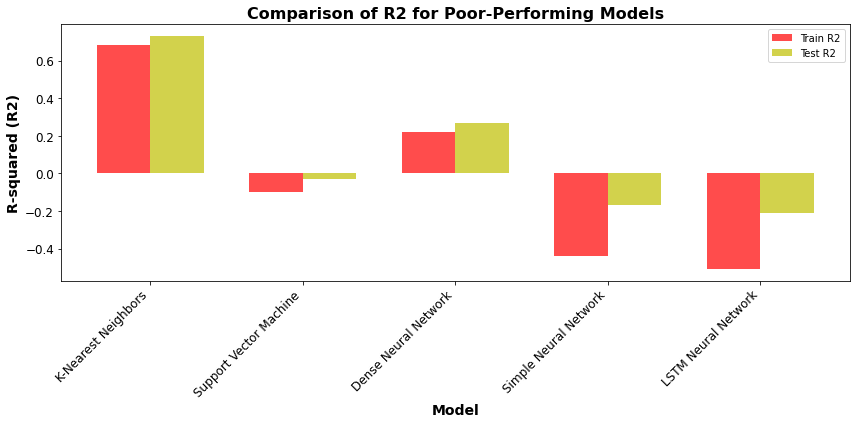

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame with the poor-performing models and their results
data = {
    'Model': ['K-Nearest Neighbors', 'Support Vector Machine', 'Dense Neural Network', 'Simple Neural Network', 'LSTM Neural Network'],
    'Train MSE': [89987.30, 309281, 218078, 404674, 423495],
    'Test MSE': [150891.00, 570328.00, 13261.7, 647169, 669948],
    'Train R2': [0.68, -0.10, 0.22, -0.44, -0.51],
    'Test R2': [0.73, -0.03, 0.27, -0.17, -0.21]
}

poor_models_df = pd.DataFrame(data)

# Create a bar chart for Train MSE and Test MSE
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(poor_models_df))

plt.bar(index - bar_width/2, poor_models_df['Train MSE'], bar_width, label='Train MSE', alpha=0.7, color='b')
plt.bar(index + bar_width/2, poor_models_df['Test MSE'], bar_width, label='Test MSE', alpha=0.7, color='g')

plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Poor-Performing Models')
plt.xticks(index, poor_models_df['Model'], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# Create a bar chart for Train R2 and Test R2
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(poor_models_df))

plt.bar(index - bar_width/2, poor_models_df['Train R2'], bar_width, label='Train R2', alpha=0.7, color='r')
plt.bar(index + bar_width/2, poor_models_df['Test R2'], bar_width, label='Test R2', alpha=0.7, color='y')

plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R2 for Poor-Performing Models')
plt.xticks(index, poor_models_df['Model'], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()